In [3]:
import os
import numpy as np
from scipy import stats
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import cm
import seaborn as sns

import pickle
from utils_ens import get_Xy_tt
from sklearn import metrics



In [4]:
# get df:
pkl_file = open('/home/simon/Documents/Articles/conflict_prediction/data/computerome/currents/rf_reg_hp_df.pkl', 'rb')
#pkl_file = open('/home/projects/ku_00017/data/generated/currents/rf_reg_hp_df.pkl', 'rb')
rf_hp_df = pickle.load(pkl_file)
pkl_file.close()


In [24]:
# buttom five
rf_hp_df.sort_values('MSE')[:5]

,n_estimators,max_depth,min_samples_split,min_samples_leaf,criterion,max_features,test_preds_con,test_preds_prob,MSE,MAE,AP,PR,ROC
6,106,9,2,116,mse,auto,"[1.272557988853477e-06, 1.272557988853477e-06,...","[0.5000003181394972, 0.5000003181394972, 0.500...",0.015538,0.007079,0.206713,"([0.003059631595379332, 0.022572151639868095, ...","([0.0, 0.0, 0.0, 0.0, 2.609630580694997e-06, 5..."
48,111,10,10,97,mse,sqrt,"[8.224198267718613e-07, 8.224198267718613e-07,...","[0.5000002056049567, 0.5000002056049567, 0.500...",0.015551,0.007145,0.203154,"([0.003059536074427898, 0.028917353921740656, ...","([0.0, 0.0, 0.0, 0.0, 2.609630580694997e-06, 2..."
41,140,10,10,109,mse,sqrt,"[7.059901484032879e-07, 7.059901484032879e-07,...","[0.5000001764975371, 0.5000001764975371, 0.500...",0.015557,0.007146,0.204820,"([0.003059536074427898, 0.003057133267594127, ...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.6096305..."
45,115,10,2,108,mse,sqrt,"[7.285970359734927e-07, 7.285970359734927e-07,...","[0.500000182149259, 0.500000182149259, 0.50000...",0.015559,0.007111,0.203722,"([0.003059536074427898, 0.003057387819887332, ...","([0.0, 0.0, 0.0, 2.609630580694997e-06, 2.6096..."
20,112,9,4,84,mse,log2,"[1.3619276937366072e-06, 1.3619276937366072e-0...","[0.5000003404819234, 0.5000003404819234, 0.500...",0.015568,0.007084,0.203666,"([0.003059536074427898, 0.030647590361445782, ...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.60..."


In [32]:
# top five
rf_hp_df.sort_values('MSE', ascending= False)[:5]

,n_estimators,max_depth,min_samples_split,min_samples_leaf,criterion,max_features,test_preds_con,test_preds_prob,MSE,MAE,AP,PR,ROC
36,148,2,9,131,mse,auto,"[0.0012066135297110856, 0.0012066135297110856,...","[0.5003016533458293, 0.5003016533458293, 0.500...",0.015986,0.008620,0.144642,"([0.003059536074427898, 0.10581039755351682, 0...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.6096305..."
9,144,3,6,183,mse,sqrt,"[0.0002787611906860066, 0.0002787611906860066,...","[0.5000696902972201, 0.5000696902972201, 0.500...",0.015975,0.007814,0.174880,"([0.003059536074427898, 0.06320648078372268, 0...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,125,2,8,56,mse,auto,"[0.00122843601239822, 0.00122843601239822, 0.0...","[0.5003071089644792, 0.5003071089644792, 0.500...",0.015969,0.008624,0.148204,"([0.003059536074427898, 0.11657648794884408, 0...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.043852232277..."
19,111,2,2,94,mse,log2,"[0.001253628269297433, 0.001253628269297433, 0...","[0.5003134070262789, 0.5003134070262789, 0.500...",0.015961,0.008634,0.145655,"([0.003059536074427898, 0.12040656763096169, 0...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.609630580694..."
12,142,2,8,128,mse,auto,"[0.0012284639482377318, 0.0012284639482377318,...","[0.5003071159484365, 0.5003071159484365, 0.500...",0.015957,0.008625,0.146974,"([0.003059536074427898, 0.11958184599694034, 0...","([0.0, 0.0, 0.0, 0.0, 2.609630580694997e-06, 2..."


0.18956753134216003


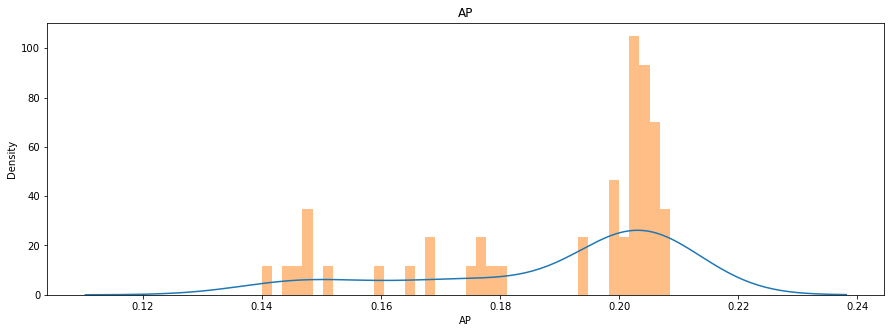

0.01572424517342566


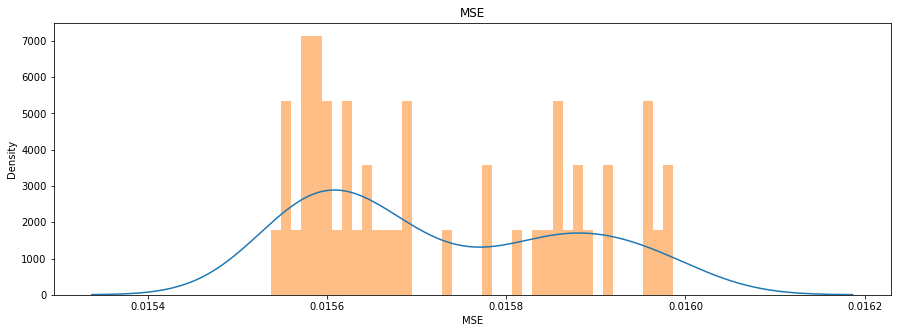

0.007328128309172422


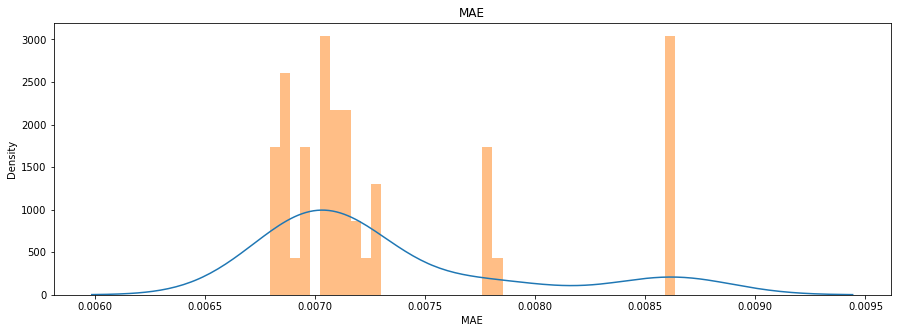

In [12]:
print(rf_hp_df['AP'].mean())
plt.figure(figsize = [15,5])
plt.title('AP')
plt.hist(rf_hp_df['AP'], bins = 40, density=True, alpha = 0.5, label = 'test', color = 'C1')
sns.kdeplot(rf_hp_df['AP'])
plt.show()

print(rf_hp_df['MSE'].mean())
plt.figure(figsize = [15,5])
plt.title('MSE')
plt.hist(rf_hp_df['MSE'], bins = 40, density=True, alpha = 0.5, label = 'test', color = 'C1')
sns.kdeplot(rf_hp_df['MSE'])
plt.show()

print(rf_hp_df['MAE'].mean())
plt.figure(figsize = [15,5])
plt.title('MAE')
plt.hist(rf_hp_df['MAE'], bins = 40, density=True, alpha = 0.5, label = 'test', color = 'C1')
sns.kdeplot(rf_hp_df['MAE'])
plt.show()

0.18956753134216003


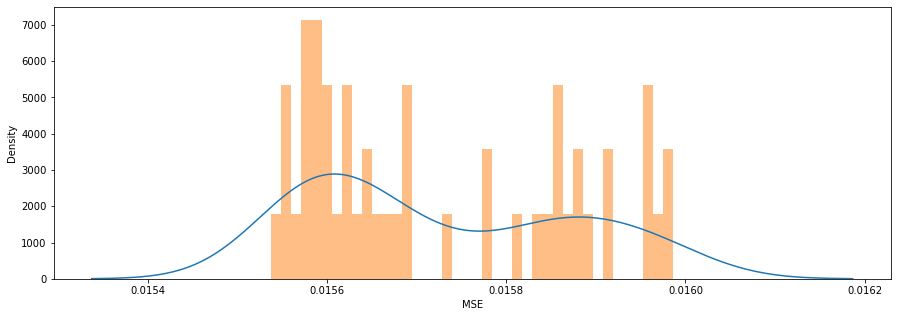

In [13]:
rf_hp_df.columns

Index(['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf',
       'criterion', 'max_features', 'test_preds_con', 'test_preds_prob', 'MSE',
       'MAE', 'AP', 'PR', 'ROC'],
      dtype='object')

n_estimators
max_depth
min_samples_split
min_samples_leaf


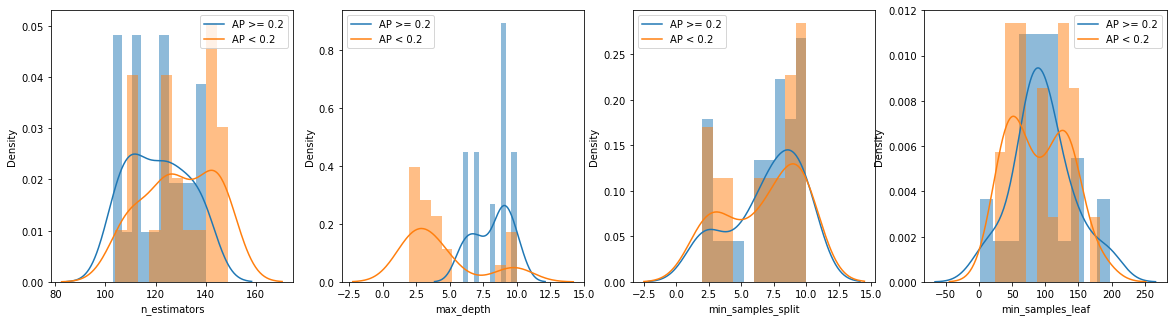

In [15]:
continues_features = ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf'] # no weights

plt.figure(figsize = [20,5])

threshold = 0.2

for i,j in enumerate(continues_features):

    print(j)

    plt.subplot(1,len(continues_features),i+1)

    sns.kdeplot(rf_hp_df[rf_hp_df['AP'] >= threshold][j], label = f'AP >= {threshold}', bw_method= 0.5) 
    sns.kdeplot(rf_hp_df[rf_hp_df['AP'] < threshold][j], label = f'AP < {threshold}', bw_method= 0.5)

    plt.hist(rf_hp_df[rf_hp_df['AP'] >= threshold][j], color = 'C0', density = True, alpha = 0.5) 
    plt.hist(rf_hp_df[rf_hp_df['AP'] < threshold][j], color = 'C1', density = True, alpha = 0.5)

    plt.legend()

plt.show()


n_estimators
max_depth
min_samples_split
min_samples_leaf


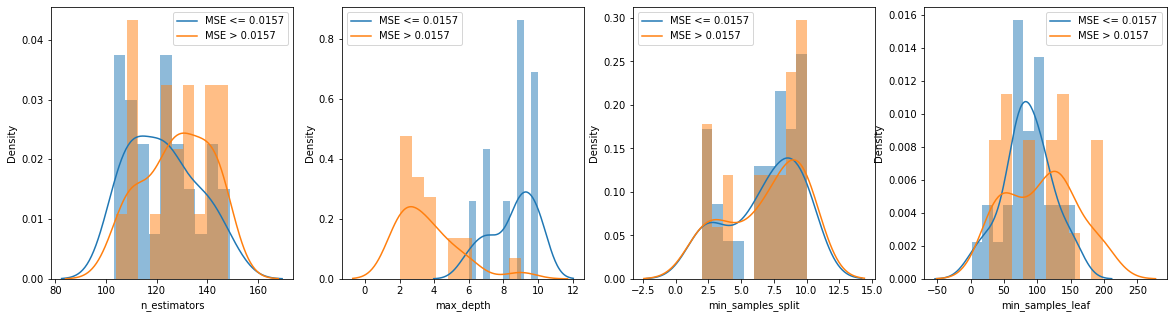

In [30]:
continues_features = ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf'] # no weights

plt.figure(figsize = [20,5])

threshold = 0.0157

for i,j in enumerate(continues_features):

    print(j)

    plt.subplot(1,len(continues_features),i+1)

    sns.kdeplot(rf_hp_df[rf_hp_df['MSE'] <= threshold][j], label = f'MSE <= {threshold}', bw_method= 0.5) 
    sns.kdeplot(rf_hp_df[rf_hp_df['MSE'] > threshold][j], label = f'MSE > {threshold}', bw_method= 0.5)

    plt.hist(rf_hp_df[rf_hp_df['MSE'] <= threshold][j], color = 'C0', density = True, alpha = 0.5) 
    plt.hist(rf_hp_df[rf_hp_df['MSE'] > threshold][j], color = 'C1', density = True, alpha = 0.5)

    plt.legend()

plt.show()


n_estimators
max_depth
min_samples_split
min_samples_leaf


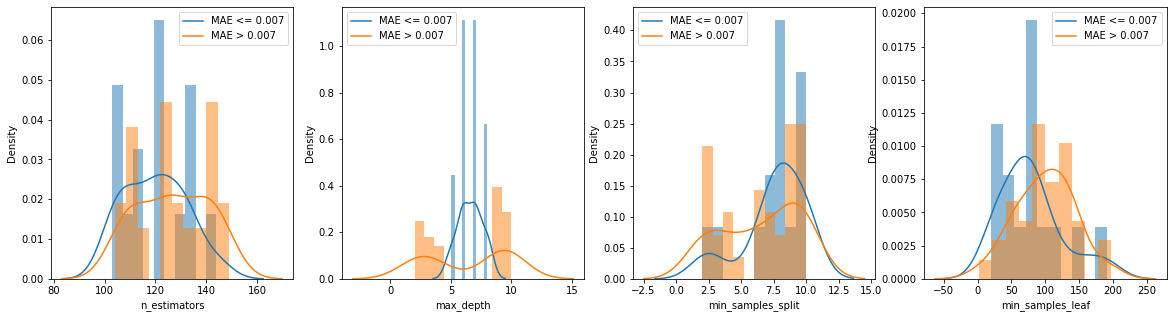

In [31]:
continues_features = ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf'] # no weights

plt.figure(figsize = [20,5])

threshold = 0.007

for i,j in enumerate(continues_features):

    print(j)

    plt.subplot(1,len(continues_features),i+1)

    sns.kdeplot(rf_hp_df[rf_hp_df['MAE'] <= threshold][j], label = f'MAE <= {threshold}', bw_method= 0.5) 
    sns.kdeplot(rf_hp_df[rf_hp_df['MAE'] > threshold][j], label = f'MAE > {threshold}', bw_method= 0.5)

    plt.hist(rf_hp_df[rf_hp_df['MAE'] <= threshold][j], color = 'C0', density = True, alpha = 0.5) 
    plt.hist(rf_hp_df[rf_hp_df['MAE'] > threshold][j], color = 'C1', density = True, alpha = 0.5)

    plt.legend()

plt.show()


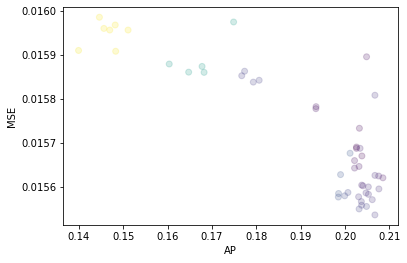

In [27]:
#I have looked at hte other parameters and there does not appear to be a relationship

plt.scatter(rf_hp_df['AP'], rf_hp_df['MSE'], c= rf_hp_df['MAE'], alpha = 0.2)
plt.xlabel('AP')
plt.ylabel('MSE')

#x_grid = np.arange(0.1,1.1,0.1)
#y_grid = x_grid * 0.52
#plt.plot(x_grid, y_grid)

plt.show()

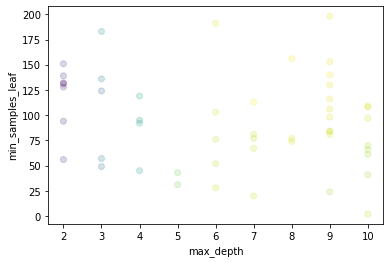

In [19]:

plt.scatter(rf_hp_df['max_depth'], rf_hp_df['min_samples_leaf'], c= rf_hp_df['AP'], alpha = 0.2)
plt.xlabel('max_depth')
plt.ylabel('min_samples_leaf')

# x_grid = np.arange(0.1,1.1,0.1)
# y_grid = x_grid * 0.52
# plt.plot(x_grid, y_grid)

plt.show()

In [11]:
#Puhu so you need a undersampling ensample...

X_train: (2818728, 30)
y_train: (2818728,)
X_test: (384372, 30)
y_test: (384372,)


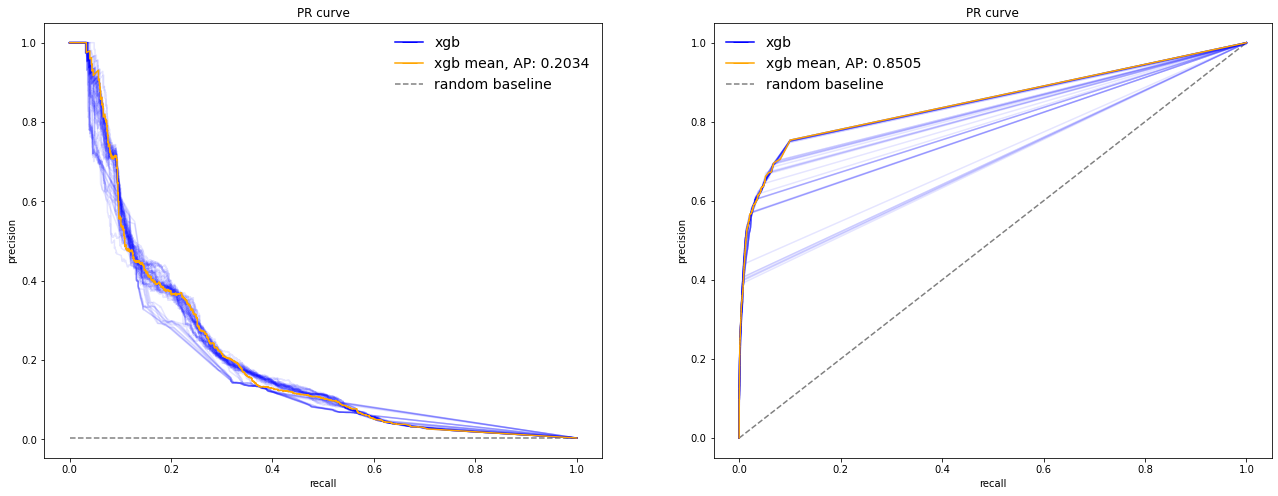

In [21]:
X_train, y_train, X_test, y_test = get_Xy_tt(local = True)

rf_pred_mean = np.array(rf_hp_df['test_preds_prob']).mean(axis = 0)
rf_pred_std = np.array(rf_hp_df['test_preds_prob']).std(axis = 0)

random_ap_base = (y_test>0).mean()
rf_mean_precision, rf_mean_recall, _ = metrics.precision_recall_curve(y_test, rf_pred_mean) 
rf_mean_AP = metrics.average_precision_score(y_test, rf_pred_mean)

rf_mean_fpr, rf_mean_tpr, _ =  metrics.roc_curve(y_test, rf_pred_mean) 
rf_mean_AUC = metrics.roc_auc_score(y_test, rf_pred_mean)

# -------------------------------------------------------------------------
# Fig
plt.figure(figsize = [22,8])

# ---------------------------------------------------------------------------
#PR/AP
plt.subplot(1,2,1)

plt.title('PR curve')
plt.ylabel('precision')
plt.xlabel('recall')

plt.hlines(random_ap_base, 0, 1, linestyles='dashed', color = 'gray')

for i in rf_hp_df['PR']: 
    
    plt.plot(i[1], i[0], color = 'blue', alpha = 0.1)
    
plt.plot(rf_mean_recall,rf_mean_precision, color = 'orange', alpha = 1)

    
rf_line = mlines.Line2D([], [], color='blue', marker='_', markersize=15, label='xgb')
rf_mean_line = mlines.Line2D([], [], color='orange', marker='_', markersize=15, label=f'xgb mean, AP: {rf_mean_AP:.4}')
random_ap_line = mlines.Line2D([], [], color='gray', linestyle='--', markersize=15, label='random baseline')

plt.legend(handles=[rf_line, rf_mean_line, random_ap_line],frameon = False, fontsize = 14)


# ---------------------------------------------------------------------------
#ROC/AUC
plt.subplot(1,2,2)

plt.title('PR curve')
plt.ylabel('precision')
plt.xlabel('recall')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

for i in rf_hp_df['ROC']: 
    
    plt.plot(i[0], i[1], color = 'blue', alpha = 0.1)
    
plt.plot(rf_mean_fpr,rf_mean_tpr, color = 'orange', alpha = 1)

    
rf_line = mlines.Line2D([], [], color='blue', marker='_', markersize=15, label='xgb')
rf_mean_line = mlines.Line2D([], [], color='orange', marker='_', markersize=15, label=f'xgb mean, AP: {rf_mean_AUC:.4}')
random_auc_line = mlines.Line2D([], [], color='gray', linestyle='--', markersize=15, label='random baseline')

plt.legend(handles=[rf_line, rf_mean_line, random_auc_line],frameon = False, fontsize = 14)

plt.show()


Right now best is with 9 features and these hp:
BC does not do a lot - nor should it..
US4 better than US2


    # Variable hyper parameters
    n_estimators = np.random.randint(125,150)
    min_samples_split = np.random.randint(2,7) # seems fine down here
    max_depth = np.random.randint(4,11)
    W_feature0 = (np.random.randint(5,10,1)*0.1)[0] #(np.random.randint(1,10,1)*0.1)[0] # value between 0.1 and 1 # wierd that his should be largest according to your tests
    W_feature1 = (np.random.randint(1,5,1)*0.1)[0] #(np.random.randint(1,10,1)*0.1)[0] # and wierd that this should be smallest..
    #W_feature0 = (np.random.randint(2,11,1)*0.1)[0] # uniform from 0.2-1. prob could be justone number but where's the fun in that..
    #W_feature1 = W_feature0 * 0.52 + np.random.randn() * 0.01 # function with a bit of random noise
    class_weight = {0:W_feature0, 1:W_feature1} 

    criterion = ['gini', 'entropy'][np.random.randint(0,2)] # bianry: one or the other. Gini just did wastly better
    max_features = ['auto', 'sqrt', 'log2'][np.random.randint(0,3)]

In [22]:
pkl_file = open('/home/simon/Documents/Articles/conflict_prediction/data/computerome/currents/preds_df.pkl', 'rb')
#pkl_file = open('/home/projects/ku_00017/data/generated/currents/preds_df.pkl', 'rb')

df_merged = pickle.load(pkl_file)
pkl_file.close()

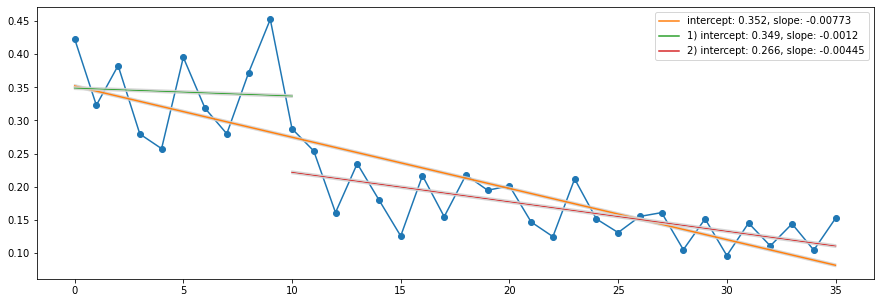

In [23]:
df_test = df_merged[df_merged['train'] == 0].copy()
df_test['pred_mean'] = rf_pred_mean
df_test['pred_std'] = rf_pred_std
df_test['y_binary'] = y_test

monthly_AP_list = []

for i in df_test['X'].unique():

    monthly_subset = df_test[ df_test['X'] == i]
    monthly_AP = metrics.average_precision_score(monthly_subset['y_binary'], monthly_subset['pred_mean'])
    monthly_AP_list.append(monthly_AP)

#
x_grid = np.arange(0, df_test['X'].unique().shape[0], 1)
res = stats.linregress(x_grid, monthly_AP_list)

y_grid = res.intercept + res.slope * x_grid

#
plt.figure(figsize = [15,5])
plt.plot(x_grid, monthly_AP_list, 'o-')

plt.plot(x_grid, y_grid + 2 * res.stderr, color = 'lightgray', alpha = 0.9) 
plt.plot(x_grid, y_grid - 2 * res.stderr, color = 'lightgray', alpha = 0.9) 
plt.plot(x_grid, y_grid, label = f'intercept: {res.intercept:.4}, slope: {res.slope:.3}' )

res_threshold = 10 # number should be based on some \ell - that is used in the ens model!

res1 = stats.linregress(x_grid[:res_threshold+1], monthly_AP_list[:res_threshold+1]) 

res2 = stats.linregress(x_grid[res_threshold:], monthly_AP_list[res_threshold:])
y_grid1 = res1.intercept + res1.slope * x_grid[:res_threshold+1]
y_grid2 = res2.intercept + res2.slope * x_grid[res_threshold:]

plt.plot(x_grid[:res_threshold+1], y_grid1, label = f'1) intercept: {res1.intercept:.3}, slope: {res1.slope:.3}' )
plt.plot(x_grid[res_threshold:], y_grid2, label = f'2) intercept: {res2.intercept:.3}, slope: {res2.slope:.3}' )

plt.plot(x_grid[:res_threshold+1], y_grid1 + 2 * res.stderr, color = 'lightgray', alpha = 0.9) 
plt.plot(x_grid[:res_threshold+1], y_grid1 - 2 * res.stderr, color = 'lightgray', alpha = 0.9) 

plt.plot(x_grid[res_threshold:], y_grid2 + 2 * res.stderr, color = 'lightgray', alpha = 0.9) 
plt.plot(x_grid[res_threshold:], y_grid2 - 2 * res.stderr, color = 'lightgray', alpha = 0.9) 


plt.legend()
plt.show()

So this should be seen in tandem with the various lenght scales (from the test set).

X_train: (2818728, 30)
y_train: (2818728,)
X_test: (384372, 30)
y_test: (384372,)
MSE: 0.0030564445028438514
MAE: 0.004285102524535786


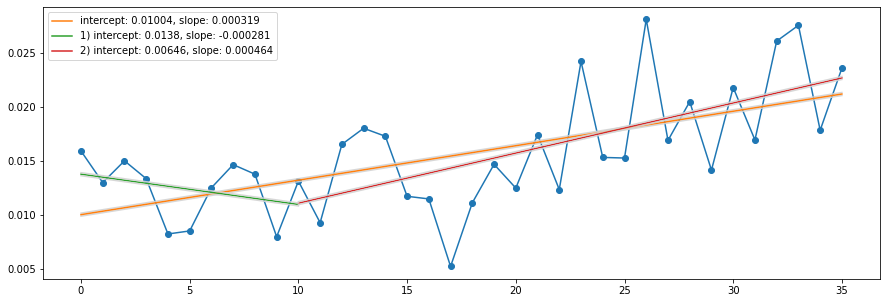

In [35]:
X_train_con, y_train_con, X_test_con, y_test_con = get_Xy_tt(local = True, binary_y= False)

rf_pred_con_mean = np.array(rf_hp_df['test_preds_con']).mean(axis = 0)
rf_pred_con_std = np.array(rf_hp_df['test_preds_con']).std(axis = 0)

rf_mean_MSE = metrics.mean_squared_error(y_test, rf_pred_con_mean)
rf_mean_MAE = metrics.mean_absolute_error(y_test, rf_pred_con_mean)
print(f'MSE: {rf_mean_MSE}')
print(f'MAE: {rf_mean_MAE}')


#df_test = df_merged[df_merged['train'] == 0].copy()
df_test['pred_con_mean'] = rf_pred_con_mean
df_test['pred_con_std'] = rf_pred_con_std
df_test['y_con'] = y_test_con

monthly_MSE_list = []

for i in df_test['X'].unique():

    monthly_subset = df_test[ df_test['X'] == i]
    monthly_MSE = metrics.mean_squared_error(monthly_subset['y_con'], monthly_subset['pred_con_mean'])
    monthly_MSE_list.append(monthly_MSE)

#
x_grid = np.arange(0, df_test['X'].unique().shape[0], 1)
res = stats.linregress(x_grid, monthly_MSE_list)

y_grid = res.intercept + res.slope * x_grid

#
plt.figure(figsize = [15,5])
plt.plot(x_grid, monthly_MSE_list, 'o-')

plt.plot(x_grid, y_grid + 2 * res.stderr, color = 'lightgray', alpha = 0.9) 
plt.plot(x_grid, y_grid - 2 * res.stderr, color = 'lightgray', alpha = 0.9) 
plt.plot(x_grid, y_grid, label = f'intercept: {res.intercept:.4}, slope: {res.slope:.3}' )

res_threshold = 10 # number should be based on some \ell - that is used in the ens model!

res1 = stats.linregress(x_grid[:res_threshold+1], monthly_MSE_list[:res_threshold+1]) 

res2 = stats.linregress(x_grid[res_threshold:], monthly_MSE_list[res_threshold:])
y_grid1 = res1.intercept + res1.slope * x_grid[:res_threshold+1]
y_grid2 = res2.intercept + res2.slope * x_grid[res_threshold:]

plt.plot(x_grid[:res_threshold+1], y_grid1, label = f'1) intercept: {res1.intercept:.3}, slope: {res1.slope:.3}' )
plt.plot(x_grid[res_threshold:], y_grid2, label = f'2) intercept: {res2.intercept:.3}, slope: {res2.slope:.3}' )

plt.plot(x_grid[:res_threshold+1], y_grid1 + 2 * res.stderr, color = 'lightgray', alpha = 0.9) 
plt.plot(x_grid[:res_threshold+1], y_grid1 - 2 * res.stderr, color = 'lightgray', alpha = 0.9) 

plt.plot(x_grid[res_threshold:], y_grid2 + 2 * res.stderr, color = 'lightgray', alpha = 0.9) 
plt.plot(x_grid[res_threshold:], y_grid2 - 2 * res.stderr, color = 'lightgray', alpha = 0.9) 


plt.legend()
plt.show()

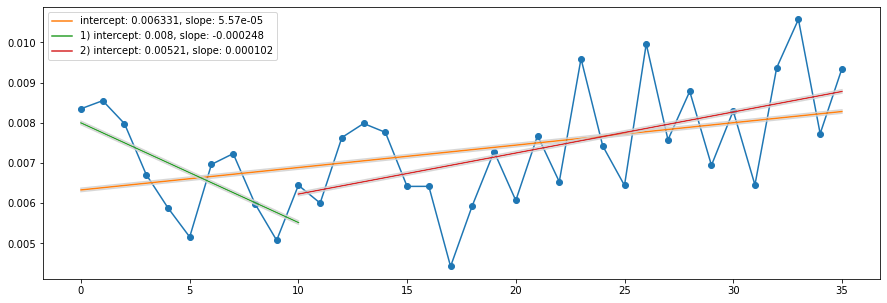

In [36]:

monthly_MAE_list = []

for i in df_test['X'].unique():

    monthly_subset = df_test[ df_test['X'] == i]
    monthly_MAE = metrics.mean_absolute_error(monthly_subset['y_con'], monthly_subset['pred_con_mean'])
    monthly_MAE_list.append(monthly_MAE)

#
x_grid = np.arange(0, df_test['X'].unique().shape[0], 1)
res = stats.linregress(x_grid, monthly_MAE_list)

y_grid = res.intercept + res.slope * x_grid

#
plt.figure(figsize = [15,5])
plt.plot(x_grid, monthly_MAE_list, 'o-')

plt.plot(x_grid, y_grid + 2 * res.stderr, color = 'lightgray', alpha = 0.9) 
plt.plot(x_grid, y_grid - 2 * res.stderr, color = 'lightgray', alpha = 0.9) 
plt.plot(x_grid, y_grid, label = f'intercept: {res.intercept:.4}, slope: {res.slope:.3}' )

res_threshold = 10 # number should be based on some \ell - that is used in the ens model!

res1 = stats.linregress(x_grid[:res_threshold+1], monthly_MAE_list[:res_threshold+1]) 

res2 = stats.linregress(x_grid[res_threshold:], monthly_MAE_list[res_threshold:])
y_grid1 = res1.intercept + res1.slope * x_grid[:res_threshold+1]
y_grid2 = res2.intercept + res2.slope * x_grid[res_threshold:]

plt.plot(x_grid[:res_threshold+1], y_grid1, label = f'1) intercept: {res1.intercept:.3}, slope: {res1.slope:.3}' )
plt.plot(x_grid[res_threshold:], y_grid2, label = f'2) intercept: {res2.intercept:.3}, slope: {res2.slope:.3}' )

plt.plot(x_grid[:res_threshold+1], y_grid1 + 2 * res.stderr, color = 'lightgray', alpha = 0.9) 
plt.plot(x_grid[:res_threshold+1], y_grid1 - 2 * res.stderr, color = 'lightgray', alpha = 0.9) 

plt.plot(x_grid[res_threshold:], y_grid2 + 2 * res.stderr, color = 'lightgray', alpha = 0.9) 
plt.plot(x_grid[res_threshold:], y_grid2 - 2 * res.stderr, color = 'lightgray', alpha = 0.9) 


plt.legend()
plt.show()